# Perspectives of developers regarding diversity and inclusion.

      Question 1 - How important do developers rate diversity and inclusion in the workplace?
      
      To initiate the data wrangling process, we'll import essential libraries required for our tasks.
      we'll utilize pandas and numpy for data manipulation and processing. Additionally, for creating basic 
      visualizations, matplotlib and seaborn can serve as a valuable asset. 


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. # Load the CSV file into a DataFrame

df = pd.read_csv('survey-results-public.csv')
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the number of rows and coloumns 
num_rows = df.shape[0]
num_cols = df.shape[1]
print("The Number of rows:",num_rows,"\nThe number of cols:",num_cols)


The Number of rows: 51392 
The number of cols: 154


In [7]:
# Check the unique values in 'DiversityImportant' and 'AssessJobDiversity'
print("Unique values in 'DiversityImportant':",list(df['DiversityImportant'].unique()))
print("Unique values in 'AssessJobDiversity':", list(df['AssessJobDiversity'].unique()))


Unique values in 'DiversityImportant': ['Agree', nan, 'Strongly agree', 'Somewhat agree', 'Strongly disagree', 'Disagree']
Unique values in 'AssessJobDiversity': ['Somewhat important', nan, 'Important', 'Not very important', 'Not at all important', 'Very important']


In [8]:
# Check for null values in 'DiversityImportant' and 'AssessJobDiversity'
# The DiversityImportant column has 40% of null values while there is 57% of nulls for the AssessJobDiversity column.
# Various choices were explored whether to drop the nulls, imputation or using an 'unkown' placeholder to replace nulls.

nulls_diversity_important = df['DiversityImportant'].isnull().sum()/df.shape[0]
nulls_assess_job_diversity = df['AssessJobDiversity'].isnull().sum()/df.shape[0]
print(f'Nulls in DiversityImportant: {nulls_diversity_important}')
print(f'Nulls in AssessJobDiversity: {nulls_assess_job_diversity}')

Nulls in DiversityImportant: 0.3986807285180573
Nulls in AssessJobDiversity: 0.572345890410959


Based on the nullson DiversityImportant and AssessJobDiversity features, I had to choose the best strategy,
which was a struggle, between removing nulls, and using a placeholder like "unkown" for imputation. 
In the end I chose using "unkown as the placeholder.The goal was to get greater isight on  importance of diversity and incusion at work in the development space.

In [54]:
#Imputationto use "unknown" as the placeholder for nulls instead of dropping them.
df_filled = df.fillna(value={'DiversityImportant': 'Unknown', 'AssessJobDiversity': 'Unknown'})

In [55]:
# Check the relevant columns
print(df_filled[['DiversityImportant', 'AssessJobDiversity']].head())

  DiversityImportant  AssessJobDiversity
0              Agree  Somewhat important
1            Unknown             Unknown
2     Strongly agree             Unknown
3              Agree           Important
4            Unknown             Unknown


In [56]:
# Count of how many times each unique response appears in the 'AssessJobDiversity' and  'DiversityImportant'column of the DataFrame.
df_filled[['AssessJobDiversity','DiversityImportant']].value_counts()

AssessJobDiversity    DiversityImportant
Unknown               Unknown               13555
                      Agree                  6231
                      Strongly agree         4286
                      Somewhat agree         3672
Somewhat important    Agree                  2377
                      Unknown                2139
Important             Agree                  1971
                      Unknown                1734
                      Strongly agree         1558
Not very important    Unknown                1523
                      Somewhat agree         1427
Somewhat important    Somewhat agree         1339
Unknown               Disagree               1152
Very important        Strongly agree         1099
Not very important    Agree                   997
Not at all important  Unknown                 847
Somewhat important    Strongly agree          788
Very important        Unknown                 691
Not at all important  Strongly disagree       552
Not very 

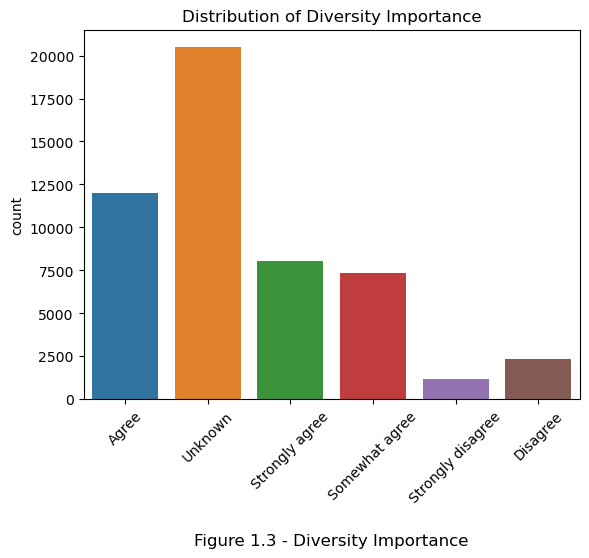

Contingency Table:
col_0               count
DiversityImportant       
Agree               12011
Disagree             2327
Somewhat agree       7363
Strongly agree       8022
Strongly disagree    1180
Unknown             20489


In [57]:
# Explore the distribution of responses for 'DiversityImportant'
sns.countplot(x='DiversityImportant', data=df_filled)
plt.title('Distribution of Diversity Importance')

plt.xticks(rotation=45) 

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.3 - Diversity Importance', fontsize=12, labelpad=20) 


plt.show()

# Calculate the contingency table
contingency_table = pd.crosstab(index=df_filled['DiversityImportant'], columns='count')

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

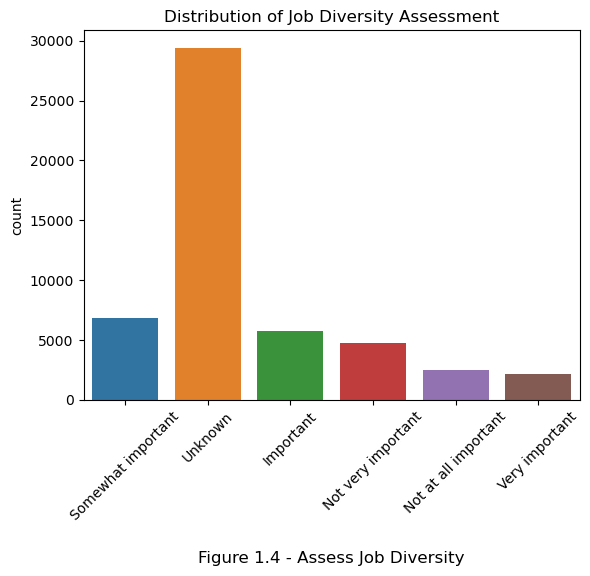

Contingency Table:
col_0                 count
AssessJobDiversity         
Important              5713
Not at all important   2531
Not very important     4779
Somewhat important     6801
Unknown               29414
Very important         2154


In [63]:
# Explore the distribution of responses for 'AssessJobDiversity'
sns.countplot(x='AssessJobDiversity', data=df_filled)
plt.title('Distribution of Job Diversity Assessment')

plt.xticks(rotation=45) 
#plt.xlabel('Figure 1.2 - AssessJobDiversity ', fontsize=12, labelpad=20) 

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.4 - Assess Job Diversity', fontsize=12, labelpad=20)

plt.show()
# Calculate the contingency table
contingency_table = pd.crosstab(index=df_filled['AssessJobDiversity'], columns='count')

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

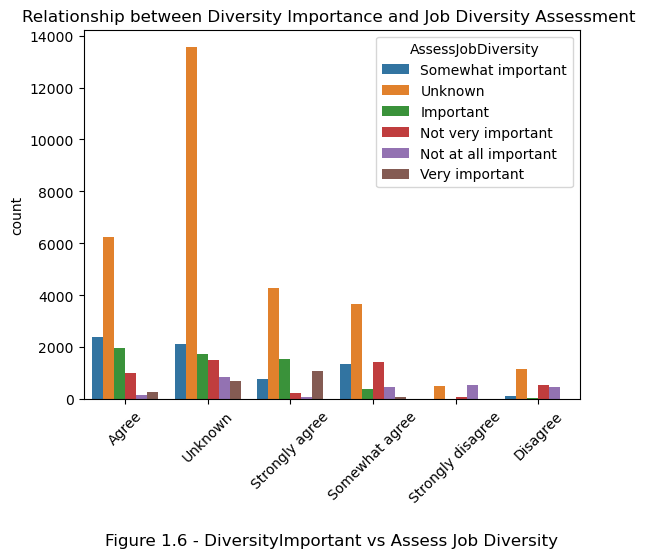

AssessJobDiversity  Important  Not at all important  Not very important  \
DiversityImportant                                                        
Agree                    1971                   161                 997   
Disagree                   41                   452                 542   
Somewhat agree            401                   453                1427   
Strongly agree           1558                    66                 225   
Strongly disagree           8                   552                  65   
Unknown                  1734                   847                1523   
Total                    5713                  2531                4779   

AssessJobDiversity  Somewhat important  Unknown  Very important  Total  
DiversityImportant                                                      
Agree                             2377     6231             274  12011  
Disagree                           133     1152               7   2327  
Somewhat agree                  

In [62]:
# Explore the relationship between 'DiversityImportant' and 'AssessJobDiversity'
sns.countplot(x='DiversityImportant', hue='AssessJobDiversity', data=df_filled)
plt.title('Relationship between Diversity Importance and Job Diversity Assessment ')
plt.xticks(rotation=45) 

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.6 - DiversityImportant vs Assess Job Diversity', fontsize=12, labelpad=20)

plt.show()

# Create a contingency table
contingency_table = pd.crosstab(df_filled['DiversityImportant'], df_filled['AssessJobDiversity'], margins=True, margins_name="Total")

# Print the table
print(contingency_table)

# Save the table in Excel format
contingency_table.to_excel('contingency_table.xlsx', index=True)

# Save the table in CSV format
contingency_table.to_csv('contingency_table2.csv', index=True)